In [23]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical


def gen_sample_grid(npt=200, x_limit = 4, y_limit = 4):
  x1line = np.linspace(0, x_limit, npt)
  x2line = np.linspace(0, y_limit, npt)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npt*npt]).T
  return Xgrid, x1line, x2line

df = pandas.read_csv('http://pogo.software/me4ml/slip_data.csv')

f1 = np.array(df['f1'][:])
f1ang = np.array(df['f1ang'][:])
f2 = np.array(df['f2'][:])
f2ang = np.array(df['f2ang'][:])
m = np.array(df['m'][:])
slips = np.array(df['slips'][:])

## combine these parameters into a single variable
X = np.column_stack((f2, f2ang))
y = np.array(df['slips'][:]) # classes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Epoch 1/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.8452
Epoch 2/1200
32/32 [==============================] - 0s 3ms/step - loss: 0.5455
Epoch 3/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4691
Epoch 4/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4454
Epoch 5/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.4377
Epoch 6/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4349
Epoch 7/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4336
Epoch 8/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4332
Epoch 9/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4332
Epoch 10/1200
32/32 [==============================] - 0s 3ms/step - loss: 0.4333
Epoch 11/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4332
Epoch 12/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4332
Epoch 13/1200
32/32 [====

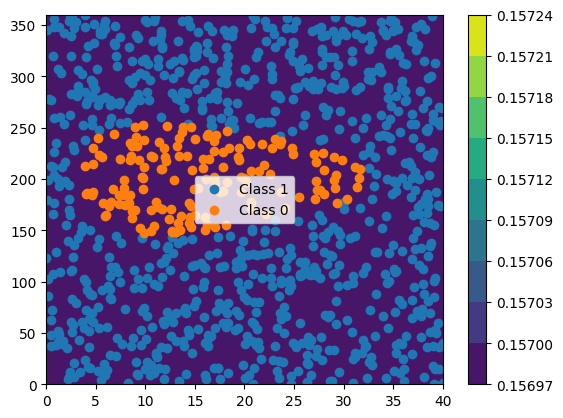

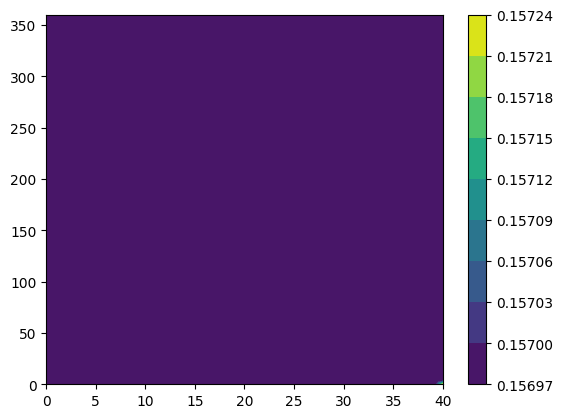

In [25]:
# set up the sequential neural network
model = Sequential()

# add the layers
model.add(Dense(units=4, activation = 'tanh', input_dim=2))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd')

y_binary = to_categorical(y)

model.fit(X,y_binary, epochs=1200,batch_size=32)

npt = 100
Xgrid, x1line, x2line = gen_sample_grid(npt, 40, 360)

# Predict the model onto Xgrid
predicted_grid = model.predict(Xgrid)
predicted_grid = np.reshape(predicted_grid[:, 0], [npt, npt])
# Set up the sequential neural network
model = Sequential()

# Add the layers
model.add(Dense(units=4, activation='relu', input_dim=2))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Normalize input data if needed
# X = normalize_data(X)

# Convert labels to categorical
y_binary = to_categorical(y)

# Fit the model
model.fit(X, y_binary, epochs=100, batch_size=32)

# Generate grid and make predictions
npt = 100
Xgrid, x1line, x2line = gen_sample_grid(npt, 40, 360)

# Predict the model onto Xgrid
predicted_grid = model.predict(Xgrid)
predicted_grid = np.reshape(predicted_grid[:, 0], [npt, npt])

# Plot the results
plt.contourf(x1line, x2line, predicted_grid, cmap='viridis')
plt.colorbar()
plt.scatter(X[Yt == 1, 0], X[Yt == 1, 1], label='Class 1')
plt.scatter(X[Yt == 0, 0], X[Yt == 0, 1], label='Class 0')
plt.legend()
plt.show()

plt.contourf(x1line, x2line, predicted_grid, cmap='viridis')
plt.colorbar()
# plt.scatter(X[Yt == 1, 0], X[Yt == 1, 1])
# plt.scatter(X[Yt == 0, 0], X[Yt == 0, 1])
plt.show()